<a href="https://colab.research.google.com/github/lgomesm/calculonumericoufabc/blob/master/C%C3%B3pia_de_Ex_3_polin%C3%B4mios_de_Taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex. 3 - polinômios de Taylor

Vamos considerar as seguintes funções:

$$ f(x) = \log{(x)} $$

$$ g(x) = \operatorname{sen}(2x) $$

$$ h(x) = \exp{(-x^2)} $$

Nota: neste curso, a menos que escreva a base explicitamente, $log$ sempre se refere ao logaritmo em base natural ($\ln(x)$). A função `np.log` calcula o logaritmo na base natural, enquanto `np.log10` e `np.log2` calculam nas bases 10 e 2. E outras bases? Pra isso usamos a matemática do colégio para converter entre bases: $\log_a{x} = \frac{\ln x}{\ln a}$.


## 1. Cálculo dos termos

Calcule (usando papel, caneta e seu conhecimento de Cálculo) o polinômio de Taylor de grau 3 para as funções $g$ e $h$ ao redor de $x=0$ e para $f$ ao redor de $x=1$

## 2. Comparando aproximações (1)

Plote as funções $f, g, h$ e os polinômios de Taylor de grau 1, 2 e 3 obtidos acima para cada uma das funções. Use o intervalo $x \in [0.1; 2]$.

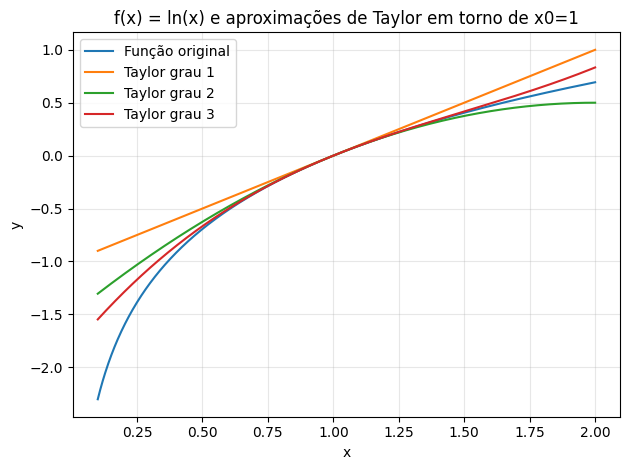

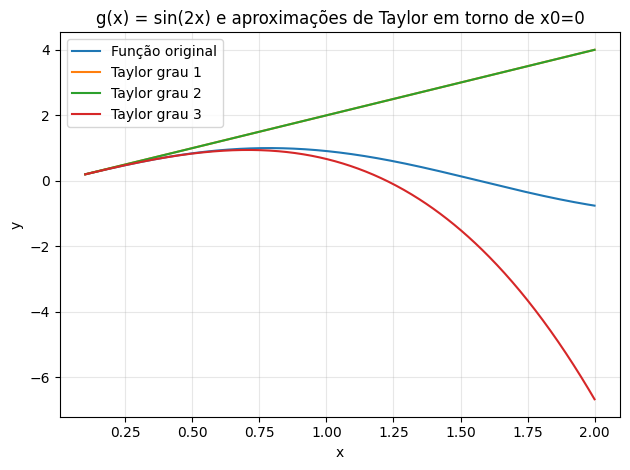

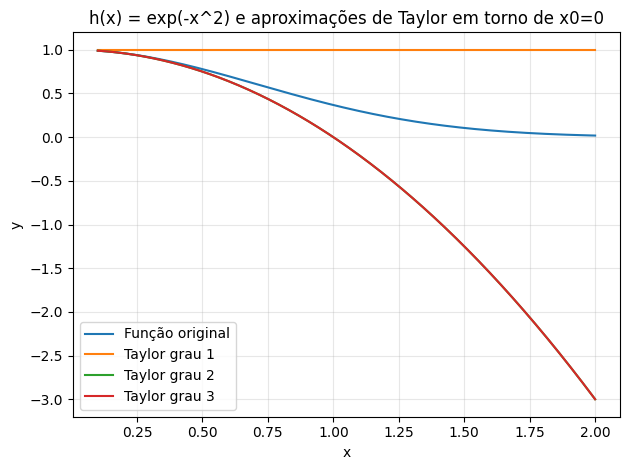

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1, 2.0, 800)

f = np.log(x)
g = np.sin(2 * x)
h = np.exp(-(x ** 2))

u = x - 1.0
f_t1 = u
f_t2 = u - (u**2) / 2.0
f_t3 = u - (u**2) / 2.0 + (u**3) / 3.0

g_t1 = 2.0 * x
g_t2 = 2.0 * x
g_t3 = 2.0 * x - (4.0 / 3.0) * (x**3)

h_t1 = np.ones_like(x)
h_t2 = 1.0 - x**2
h_t3 = 1.0 - x**2

def plot_family(x, y, t1, t2, t3, title):
    plt.figure()
    plt.plot(x, y, label="Função original")
    plt.plot(x, t1, label="Taylor grau 1")
    plt.plot(x, t2, label="Taylor grau 2")
    plt.plot(x, t3, label="Taylor grau 3")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

plot_family(x, f, f_t1, f_t2, f_t3, "f(x) = ln(x) e aproximações de Taylor em torno de x0=1")
plot_family(x, g, g_t1, g_t2, g_t3, "g(x) = sin(2x) e aproximações de Taylor em torno de x0=0")
plot_family(x, h, h_t1, h_t2, h_t3, "h(x) = exp(-x^2) e aproximações de Taylor em torno de x0=0")

plt.show()


## 3. Comparando aproximações (2)

Agora queremos saber como **exatamente** se comporta o erro dessas aproximações à medida que acrescentamos mais termos. Plote

$$ E_n = | f(x) - P_n(x) | =  | \log(x) - P_n(x) |$$

no intervalo $x \in [1.01; 1.5]$ para os polinômios de grau $n = 1, 2, 3, 4$.

Coloque o eixo y na escala **logarítmica**.

Dica: `numpy` tem uma função para calcular o módulo (valor absoluto) de um vetor chamada `np.abs()`.

O que você observa no gráfico? Tente relacionar esse gráfico ao conteúdo do teorema de Taylor.

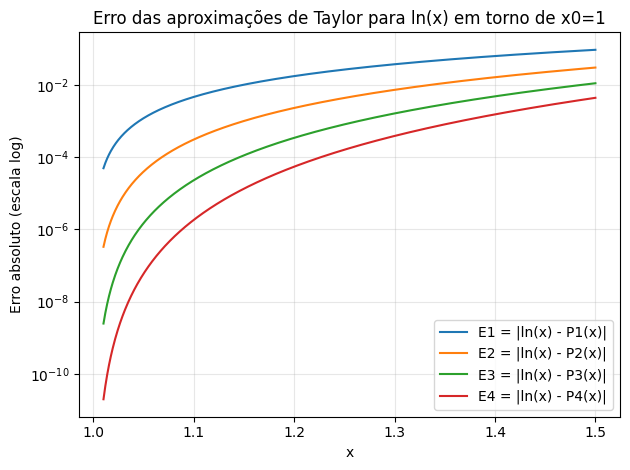

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_ln_around_1(x: np.ndarray, degree: int) -> np.ndarray:
    if degree < 1:
        raise ValueError("degree deve ser >= 1")
    if np.any(x <= 0):
        raise ValueError("ln(x) exige x > 0")

    u = x - 1.0
    p = np.zeros_like(x, dtype=float)

    for k in range(1, degree + 1):
        p += ((-1) ** (k + 1)) * (u ** k) / k

    return p

def main():
    x = np.linspace(1.01, 1.5, 800)
    f = np.log(x)

    degrees = [1, 2, 3, 4]
    errors = {}

    for n in degrees:
        pn = taylor_ln_around_1(x, n)
        errors[n] = np.abs(f - pn)

    plt.figure()
    for n in degrees:
        plt.plot(x, errors[n], label=f"E{n} = |ln(x) - P{n}(x)|")

    plt.yscale("log")
    plt.title("Erro das aproximações de Taylor para ln(x) em torno de x0=1")
    plt.xlabel("x")
    plt.ylabel("Erro absoluto (escala log)")
    plt.grid(True, which="both", alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


## 4. Limitando o erro

Agora tomemos a função $g(x) = \operatorname{sen}(2x)$: sabemos que ela é **sempre** limitada a $[-1; 1]$, e ainda que suas derivadas são sempre senos e cossenos, que também terão limitações similares.

Escreva a expressão geral para o polinômio de Taylor de grau $n$ de $g(x)$ ao redor de $x=0$, *incluindo o termo de resto*.

Use o termo de resto para calcular quantos termos são necessários para que o erro seja no máximo $10^{-6}$ quando tentarmos calcular:

* a) $sen(0.01)$
* b) $sen(0.1)$
* c) $sen(0.5)$

Compare o valor obtido exatamente (usando `np.sin()`) com o valor aproximado pelo polinômio de Taylor (aqui implementar a fórmula geral do polinômio de Taylor de grau $n$ pode ser mais fácil do que digitar todos os termos!).

In [ ]:
import math
import numpy as np

TOL = 1e-6

def taylor_sin2(x: float, degree: int) -> float:
    s = 0.0
    max_m = (degree - 1) // 2
    for m in range(max_m + 1):
        p = 2 * m + 1
        s += ((-1) ** m) * (2 * x) ** p / math.factorial(p)
    return s

def remainder_bound(x: float, degree: int) -> float:
    k = degree + 1
    return (2 ** k) * (abs(x) ** k) / math.factorial(k)

def minimal_degree_for_tol(x: float, tol: float = TOL) -> int:
    degree = 0
    while remainder_bound(x, degree) > tol:
        degree += 1
    return degree

def run():
    targets = [0.01, 0.1, 0.5]
    print("a      x=a/2     n_min   sin(a)            Taylor(P_n)        |erro|")
    for a in targets:
        x = a / 2.0
        n = minimal_degree_for_tol(x)
        exact = math.sin(a)
        approx = taylor_sin2(x, n)
        err = abs(exact - approx)
        print(f"{a:<6} {x:<8} {n:<6} {exact:<16.12f} {approx:<16.12f} {err:.3e}")

if __name__ == "__main__":
    run()


a      x=a/2     n_min   sin(a)            Taylor(P_n)        |erro|
0.01   0.005    2      0.009999833334   0.010000000000   1.667e-07
0.1    0.05     4      0.099833416647   0.099833333333   8.331e-08
0.5    0.25     7      0.479425538604   0.479425533234   5.370e-09
